In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading training data
train = pd.read_csv("train_v9rqX0R.csv")

In [3]:
#viewing records
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# shape
train.shape

(8523, 12)

In [5]:
#summary statistics
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Item_Visibilty cannot be zero

In [8]:
train['Item_Type'].nunique()

16

In [9]:
train['Item_Identifier'].nunique()

1559

C:\Users\akshathi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


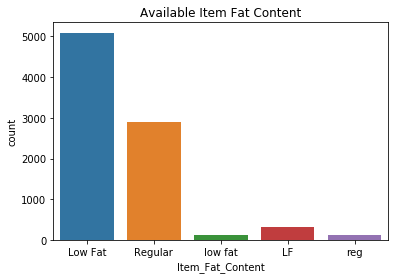

In [10]:
sns.countplot(train['Item_Fat_Content']) 
plt.title("Available Item Fat Content")
plt.show()

C:\Users\akshathi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


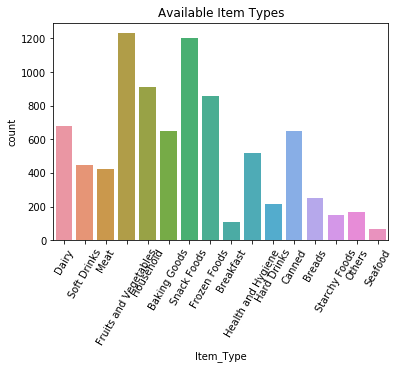

In [11]:
sns.countplot(train['Item_Type']) 
plt.xticks(rotation=60)
plt.title("Available Item Types")
plt.show()

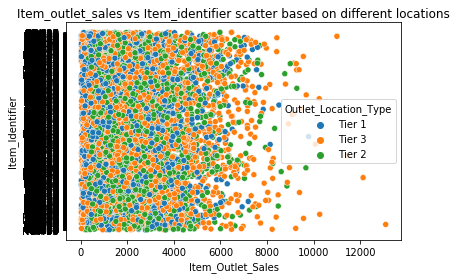

In [12]:
sns.scatterplot(x= train['Item_Outlet_Sales'], y= train['Item_Identifier'], hue = train['Outlet_Location_Type'])
plt.title("Item_outlet_sales vs Item_identifier scatter based on different locations")
plt.show()

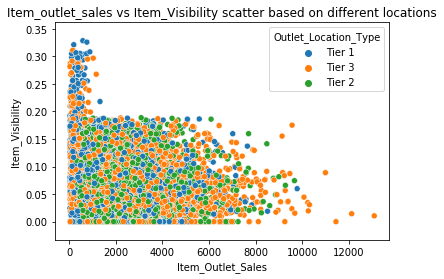

In [13]:
sns.scatterplot(x= train['Item_Outlet_Sales'], y= train['Item_Visibility'], hue = train['Outlet_Location_Type'])
plt.title("Item_outlet_sales vs Item_Visibility scatter based on different locations")
plt.show()

C:\Users\akshathi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


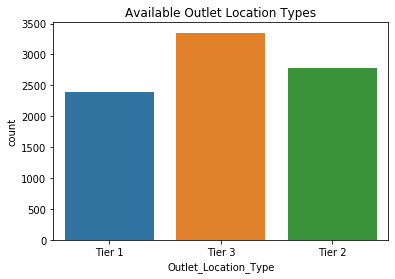

In [14]:
sns.countplot(train['Outlet_Location_Type'])
plt.title("Available Outlet Location Types")
plt.show()

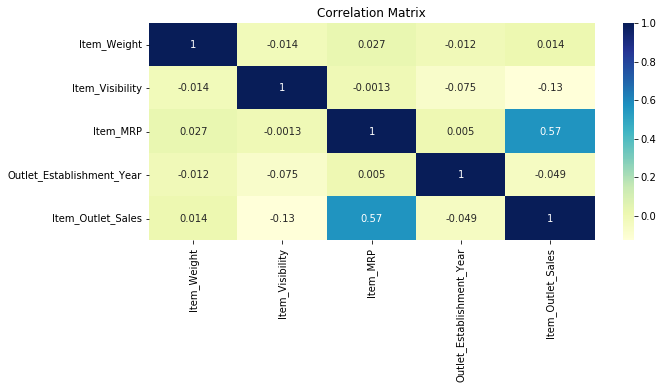

In [15]:
#plotting correlation matrix
corrmatrix = train.corr()
plt.subplots(figsize=(10, 4))
plt.title("Correlation Matrix")
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
plt.show()

In [16]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

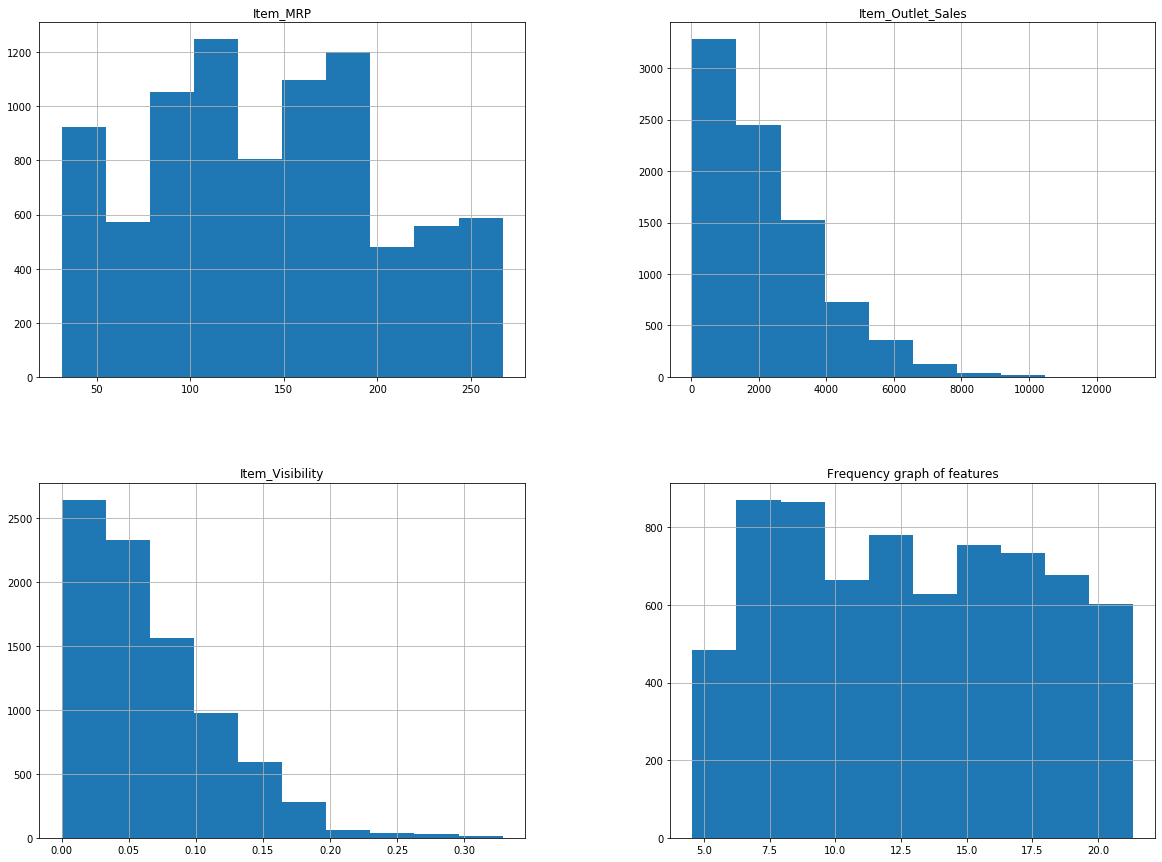

In [17]:
freqgraph = train.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.title("Frequency graph of features")
plt.show()

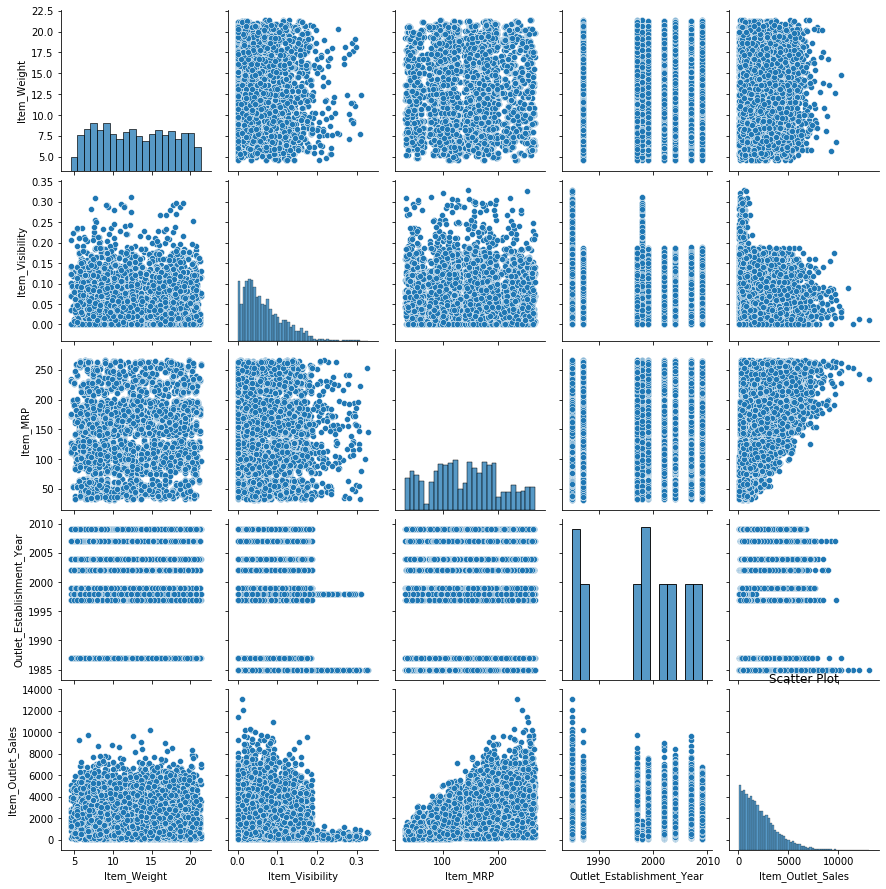

In [18]:
sns.pairplot(train)
plt.title("Scatter Plot")
plt.show()

In [19]:
# Item Visibility cannot be zero, zero values replaced by mean 
train.Item_Visibility[train[train['Item_Visibility']==0].index]=train['Item_Visibility'].mean()

C:\Users\akshathi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.643456,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
# inserting missing values of Item weight
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [22]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\Users\akshathi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Available Outlet Sizes')

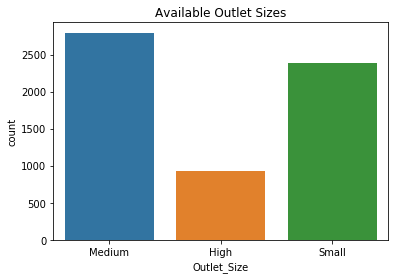

In [23]:
sns.countplot(train['Outlet_Size'])
plt.title("Available Outlet Sizes")

In [24]:
# inserting missing values of Outlet_size
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [25]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
# Item Fat content has only two unique values , others are mistakes
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
# mapping lf and low fat to Low Fat and reg to Regular 
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

In [28]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
# oulet number of years of establishment is calculated and replaced in outlet_years column 
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']

In [30]:
# dropping outlet_establishment_year
train.drop('Outlet_Establishment_Year', axis =1,inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Years          8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
# Item_Outlet_Sales is the target

In [33]:
# Item_Identifier label encoding
# Item_Fat_Content label encoding
# Item_Type label encoding
# Outlet_Identifier label ending
# Outlet_Location_Type label encoding
# Outlet_Size label encoding
# Outlet_Type label encoding

In [34]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [35]:
columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [36]:
label_encoder = LabelEncoder()

In [37]:
for i in columns:
    train[i] = label_encoder.fit_transform(train[i])

In [38]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,14
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,4
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,14
3,1121,19.20,1,0.066132,6,182.0950,0,1,2,0,732.3800,15
4,1297,8.93,0,0.066132,9,53.8614,1,0,2,1,994.7052,26


In [39]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
8518,370,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834,26
8519,897,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850,11
8520,1357,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136,9
8521,681,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976,4
8522,50,14.800,0,0.044878,14,75.4670,8,2,0,1,765.6700,16


In [40]:
test = pd.read_csv('test_AbJTz2l.csv')

In [41]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
# inserting missing values of Item weight
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [44]:
# inserting missing values of Outlet_size
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [45]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [46]:
# oulet number of years of establishment is calculated and replaced in outlet_years column 
test['Outlet_Years'] = 2013 - test['Outlet_Establishment_Year']

In [47]:
test.drop('Outlet_Establishment_Year', axis =1,inplace=True)

In [48]:
# Item Fat content has only two unique values , others are mistakes
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

In [49]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [50]:
test.Item_Visibility[test[test['Item_Visibility']==0].index]=test['Item_Visibility'].mean()

C:\Users\akshathi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.069765,141.023273,15.171097
std,4.245189,0.048394,61.809091,8.372256
min,4.555000,0.003591,31.990000,4.000000
25%,9.195000,0.033208,94.412000,9.000000
50%,12.695633,0.062137,141.415400,14.000000
75%,15.850000,0.093463,186.026600,26.000000
max,21.350000,0.323637,266.588400,28.000000


In [52]:
for i in columns:
    test[i] = label_encoder.fit_transform(test[i])

In [53]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,1103,20.750000,0,0.007565,13,107.8622,9,1,0,1,14
1,1067,8.300000,1,0.038428,4,87.3198,2,1,1,1,6
2,1406,14.600000,0,0.099575,11,241.7538,0,1,2,0,15
3,809,7.315000,0,0.015388,13,155.0340,2,1,1,1,6
4,1184,12.695633,1,0.118599,4,234.2300,5,1,2,3,28


In [54]:
train.shape

(8523, 12)

In [55]:
test.shape

(5681, 11)

In [56]:
# splitting into feature and target
X = train.drop('Item_Outlet_Sales', axis =1)
y = train['Item_Outlet_Sales']

In [57]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
Item_Outlet_Sales = regressor.predict(test)

In [59]:
Item_Outlet_Sales = pd.DataFrame(Item_Outlet_Sales, columns=['Item_Outlet_Sales'])

In [60]:
sample = pd.read_csv('sample_submission_8RXa3c6.csv')

In [61]:
sample['Item_Outlet_Sales'] = Item_Outlet_Sales

In [62]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1667.595970
1,FDW14,OUT017,1248.155286
2,NCN55,OUT010,650.087120
3,FDQ58,OUT017,2312.669616
4,FDY38,OUT027,6071.297040


In [63]:
sample.to_csv('sampleRandom.csv', index=False)